# **Healthcare Chatbot**

![image](image.jpg)


### a. Objectives

#### Main Objectives

- To build a healthcare chatbot that leverages a synthetic healthcare dataset to answer various queries, provide insights, and assist with tasks related to healthcare data analysis and patient management.

#### Specific Objectives

- Understand the types of queries the chatbot should handle.
- Define success criteria for the chatbot's performance.


### d. Notebook Structure


i. Business Understanding <br>

ii. Data Understanding<br>

iii. Exploratory Data Analysis<br>

iv. Data Preprocessing<br>

v. Modeling<br>

vi. Evaluation<br>

vii. Conclusion<br>

viii. Recommendation<br>

ix. Next Steps





### f. Metric of Success

- The performance of the model is evaluated based on achieving an accuracy of over 85%.



## 2. Data Understanding

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the datasets

In [5]:
health = pd.read_csv('healthcare_dataset.csv')
health.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
# checking the info of the dataset
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [7]:
#Checking the shape of the dataset
health.shape

(55500, 15)

In [9]:
# checking for duplicates
health.duplicated().sum()

534

In [12]:
# Remove duplicates
health = health.drop_duplicates()
# Verify removal of duplicates
duplicates_count_after = health.duplicated().sum()
duplicates_count_after

0

In [14]:
# Check for missing values
missing_values = health.isnull().sum()
missing_values

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

- This shows that the datasets does not have any missing values, which is beneficial for analysis and modeling tasks as it ensures there are no gaps in the data that could potentially impact the results.

In [17]:
# Drop specific columns
columns_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 
                   'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Test Results']

health = health.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame to verify
health.head()



,Age,Gender,Blood Type,Medical Condition,Medication
0,30,Male,B-,Cancer,Paracetamol
1,62,Male,A+,Obesity,Ibuprofen
2,76,Female,A-,Obesity,Aspirin
3,28,Female,O+,Diabetes,Ibuprofen
4,43,Female,AB+,Cancer,Penicillin


- I'm refining the dataset for a model or chatbot where patients input their medical condition. The model will recommend medications based on this input. I'm keeping essential columns: Gender, Blood Type, Medical Condition, and Medication

## 3. Exploratory Data Analysis


- This stage entails thoroughly exploring and comprehending the dataset prior to employing machine learning algorithms. It plays a crucial role in tasks such as data preprocessing, selecting appropriate models, and devising strategies for evaluating model performance.

                Age
count  54966.000000
mean      51.535185
std       19.605661
min       13.000000
25%       35.000000
50%       52.000000
75%       68.000000
max       89.000000


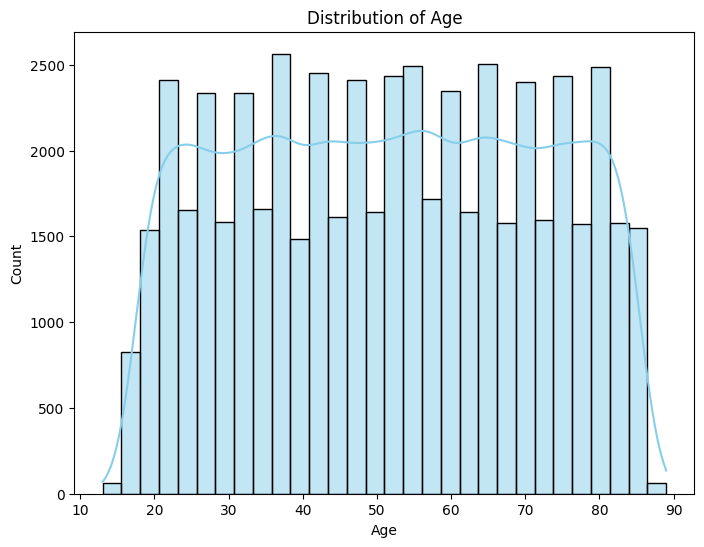

In [21]:

# Summary statistics
print(health.describe())

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(health['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### i) Univariate Analysis

- Bar charts for Gender, Blood Type, and Medical Condition to understand their frequencies.

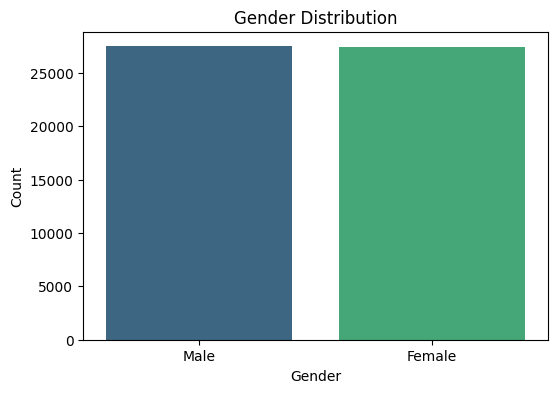

In [22]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=health, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



- There is an even representation of the gender distribution

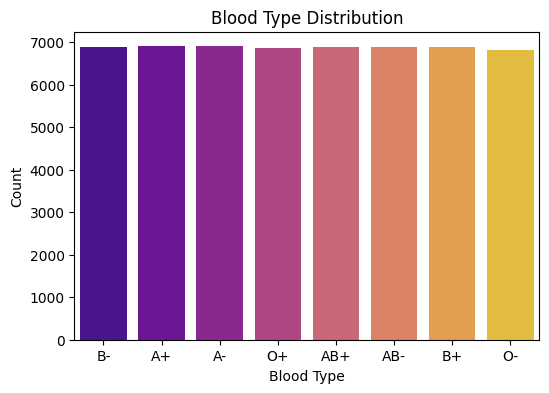

In [23]:
# Blood Type distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Blood Type', data=health, palette='plasma')
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()


- The Blood type distribution is also balanced

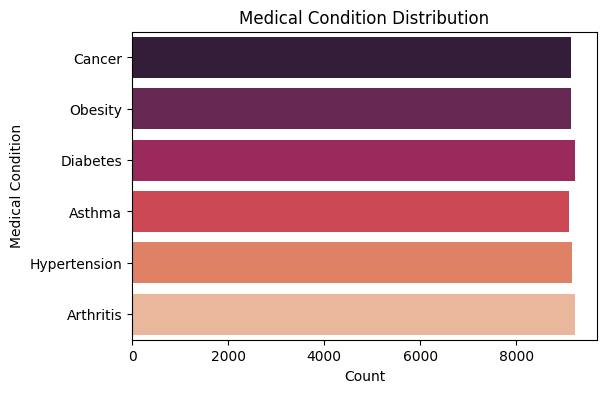

In [26]:

# Medical Condition distribution
plt.figure(figsize=(6, 4))
sns.countplot(y='Medical Condition', data=health, palette='rocket')
plt.title('Medical Condition Distribution')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()


### iii) Bivariate Analysis

- Explore relationships between variables

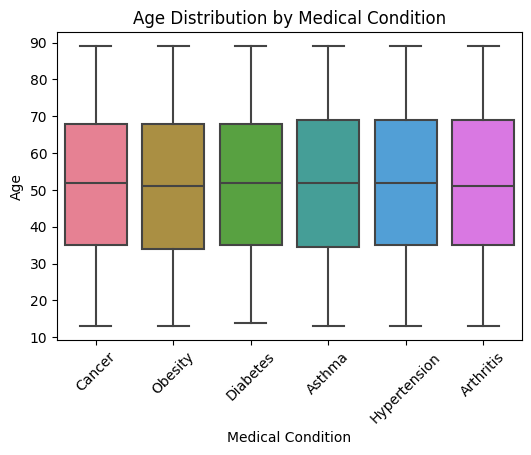

In [28]:
# Relationship between Age and Medical Condition
plt.figure(figsize=(6, 4))
sns.boxplot(x='Medical Condition', y='Age', data=health, palette='husl')
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

- According to the dataset people between age of 40 and 70 tend to have either cancer, obesity, diabetes, asthma, Hypertension and Arthritis

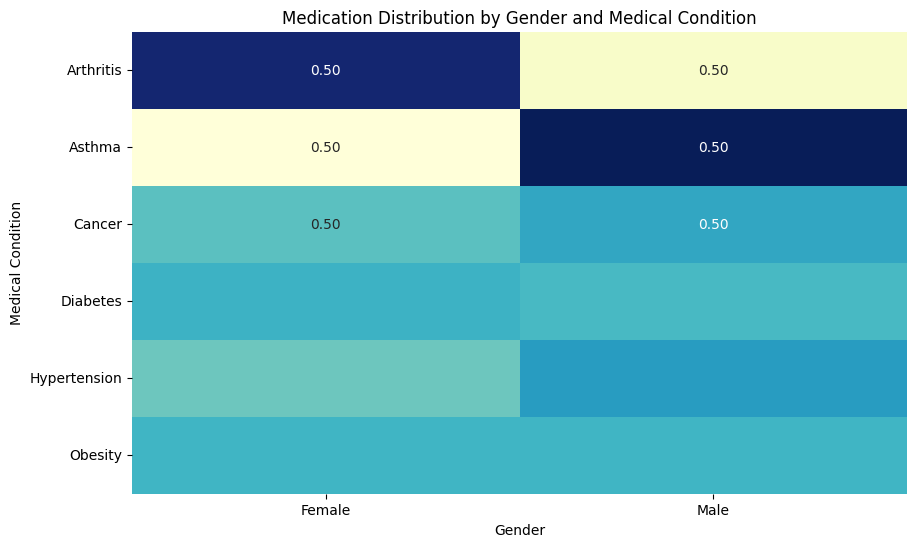

In [29]:
# Cross-tabulation of Medication by Gender and Medical Condition
medication_gender_condition = pd.crosstab(index=health['Medical Condition'], columns=health['Gender'], values=health['Medication'], aggfunc='count', normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(medication_gender_condition, annot=True, cmap='YlGnBu', fmt='.2f', cbar=False)
plt.title('Medication Distribution by Gender and Medical Condition')
plt.xlabel('Gender')
plt.ylabel('Medical Condition')
plt.show()

Medication is distributed evenly

#### 4) Text Preprocessing

In [31]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into string
    text = ' '.join(tokens)
    
    return text

# Apply preprocessing to 'Medical Condition' and 'Medication' columns
health['Medical Condition'] = health['Medical Condition'].apply(preprocess_text)
health['Medication'] = health['Medication'].apply(preprocess_text)

# Check the preprocessed dataset
print(health)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            cancer   
1           LesLie TErRy   62    Male         A+           obesity   
2            DaNnY sMitH   76  Female         A-           obesity   
3           andrEw waTtS   28  Female         O+          diabetes   
4          adrIENNE bEll   43  Female        AB+            cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            asthma   
55496         KYle pEREz   61  Female        AB-           obesity   
55497       HEATher WaNG   38  Female         B+      hypertension   
55498     JENniFER JOneS   43    Male         O-         arthritis   
55499       jAMES GARCiA   53  Female         O+         arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

### TF-IDF Vectorization

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Medical Condition' column
tfidf_medical_condition = tfidf_vectorizer.fit_transform(health['Medical Condition'])

# Convert to DataFrame for inspection 
tfidf_df = pd.DataFrame(tfidf_medical_condition.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix for 'Medical Condition'
print("TF-IDF Matrix for 'Medical Condition':")
print(tfidf_df)


TF-IDF Matrix for 'Medical Condition':
       arthritis  asthma  cancer  diabetes  hypertension  obesity
0            0.0     0.0     1.0       0.0           0.0      0.0
1            0.0     0.0     0.0       0.0           0.0      1.0
2            0.0     0.0     0.0       0.0           0.0      1.0
3            0.0     0.0     0.0       1.0           0.0      0.0
4            0.0     0.0     1.0       0.0           0.0      0.0
...          ...     ...     ...       ...           ...      ...
55495        0.0     1.0     0.0       0.0           0.0      0.0
55496        0.0     0.0     0.0       0.0           0.0      1.0
55497        0.0     0.0     0.0       0.0           1.0      0.0
55498        1.0     0.0     0.0       0.0           0.0      0.0
55499        1.0     0.0     0.0       0.0           0.0      0.0

[55500 rows x 6 columns]


#### Feature Intergration

In [43]:
df_features = pd.concat([tfidf_df, health[['Age', 'Gender','Blood Type']]], axis=1)

# Example of integrated features dataset
print("Integrated Features Dataset:")
print(df_features.head())

Integrated Features Dataset:
   arthritis  asthma  cancer  diabetes  hypertension  obesity  Age  Gender  \
0        0.0     0.0     1.0       0.0           0.0      0.0   30    Male   
1        0.0     0.0     0.0       0.0           0.0      1.0   62    Male   
2        0.0     0.0     0.0       0.0           0.0      1.0   76  Female   
3        0.0     0.0     0.0       1.0           0.0      0.0   28  Female   
4        0.0     0.0     1.0       0.0           0.0      0.0   43  Female   

  Blood Type  
0         B-  
1         A+  
2         A-  
3         O+  
4        AB+  


### One hot encoder

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encode categorical variables (gender) using OneHotEncoder
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), ['Gender'])
], remainder='passthrough')

## 5) Modelling

### Logistic Regression